In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df =  pd.read_csv('heart.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df = df.sample(frac=1)

In [6]:
X=df.drop(['target'], axis=1).values
y =df['target'].values

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [10]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
y_pred = tree.predict(X_test)

In [12]:
accuracy_score(y_pred, y_test)

0.8026315789473685

In [13]:
y_pred_train = tree.predict(X_train)

In [14]:
accuracy_score(y_pred_train, y_train)

1.0

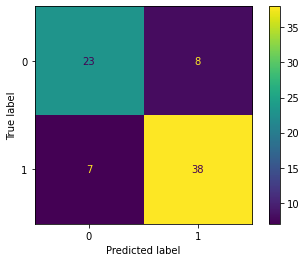

In [15]:
plot_confusion_matrix(tree, X_test, y_test)

In [18]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
y_pred = forest.predict(X_test)
accuracy_score(y_pred, y_test)

0.7763157894736842

In [20]:
y_pred_train = forest.predict(X_train)
accuracy_score(y_pred_train, y_train)

1.0

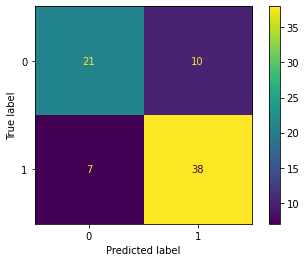

In [21]:
plot_confusion_matrix(forest, X_test, y_test)

In [49]:
logit = LogisticRegression(max_iter =10000)
logit.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [24]:
y_pred = logit.predict(X_test)
accuracy_score(y_test, y_pred)

0.75

In [25]:
y_pred_train = logit.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.8678414096916299

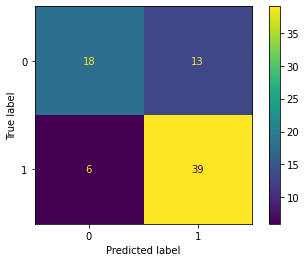

In [26]:
plot_confusion_matrix(logit, X_test, y_test)

In [27]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred =knn.predict(X_test)
accuracy_score(y_pred, y_test)

0.6578947368421053

In [29]:
y_pred_train = knn.predict(X_train)
accuracy_score(y_pred_train, y_train)

0.7444933920704846

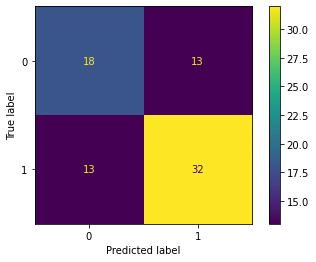

In [30]:
plot_confusion_matrix(knn, X_test, y_test)

In [31]:
gauss = GaussianNB()
gauss.fit(X_train, y_train)

GaussianNB()

In [32]:
y_pred =gauss.predict(X_test)
accuracy_score(y_pred, y_test)

0.75

In [34]:
y_pred_train = gauss.predict(X_train)
accuracy_score(y_pred_train, y_train)

0.8634361233480177

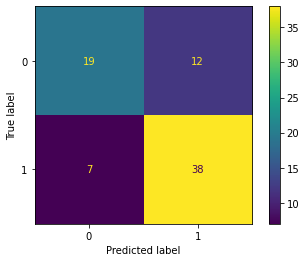

In [37]:
plot_confusion_matrix(gauss, X_test, y_test)

In [46]:
def fit_all(X, y):
    models = [LogisticRegression(max_iter=1000), KNeighborsClassifier(),
              DecisionTreeClassifier(), RandomForestClassifier(),
              GaussianNB()]
    names = ['Logit', 'KNN', 'CART', 'FOREST', 'GAUSS']
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    for i in range(len(models)):
        print(names[i])
        models[i].fit(X_train, y_train)
        y_pred = models[i].predict(X_test)
        y_pred_train = models[i].predict(X_train)
        train_acc = accuracy_score(y_train, y_pred_train)
        test_acc = accuracy_score(y_test, y_pred)
        print(f"train acc - {train_acc}")
        print(f"test acc - {train_acc}")
        #plot_confusion_matrix(models[i], X_test, y_test)

In [47]:
fit_all(X, y)

Logit
train acc - 0.8766519823788547
test acc - 0.8766519823788547
KNN
train acc - 0.762114537444934
test acc - 0.762114537444934
CART
train acc - 1.0
test acc - 1.0
FOREST
train acc - 1.0
test acc - 1.0
GAUSS
train acc - 0.8546255506607929
test acc - 0.8546255506607929
